In [2]:
### Importing the requisite packages

#Data management
import geopandas as gpd
import numpy as np
import pandas as pd

# Visualization
import seaborn
import contextily
import matplotlib.pyplot as plt

# Spatial Statistics
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [3]:
### Reading in the data
data_path = r'G:\My Drive\Geospatial Data Science with Python\Data\\'

dg_pdf = pd.read_csv(data_path + 'DollarGeneralStores_22815.csv')
dg_pdf.drop(columns=['geometry'], inplace=True)

# Converting the pandas dataframe into a geopandas geodataframe
dg_gdf = gpd.GeoDataFrame(
    dg_pdf, geometry=gpd.points_from_xy(dg_pdf.x, dg_pdf.y)
)

<AxesSubplot:>

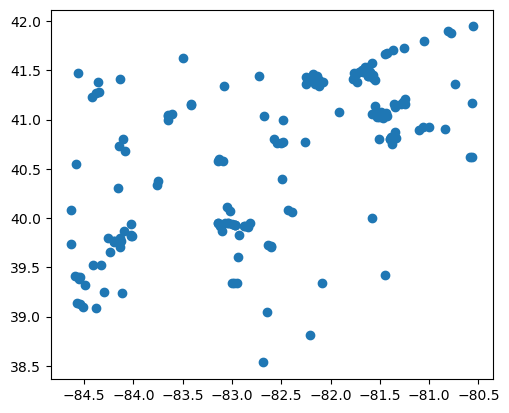

In [4]:
# Create an initial visualization of the data 
dg_gdf.plot()

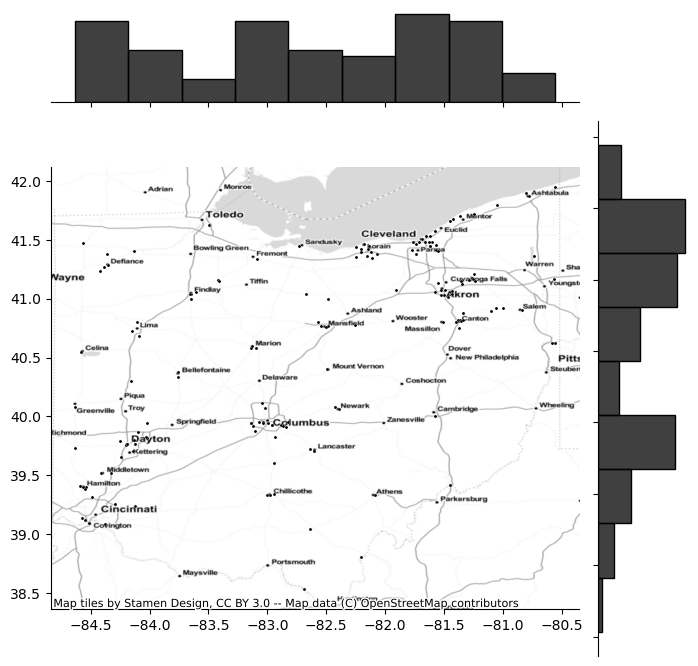

In [5]:
# Create a better visualization

joint_axes = seaborn.jointplot(
    x=dg_gdf.geometry.x, 
    y=dg_gdf.geometry.y, 
    data=dg_gdf, 
    s=5, 
    height=7,
color='k');

contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.Stamen.TonerLite
);


## Ripley's Alphabet

### Ripley's G

In [6]:
g_test = distance_statistics.g_test(
    dg_gdf[['x','y']].values, support=40, keep_simulations=True
)

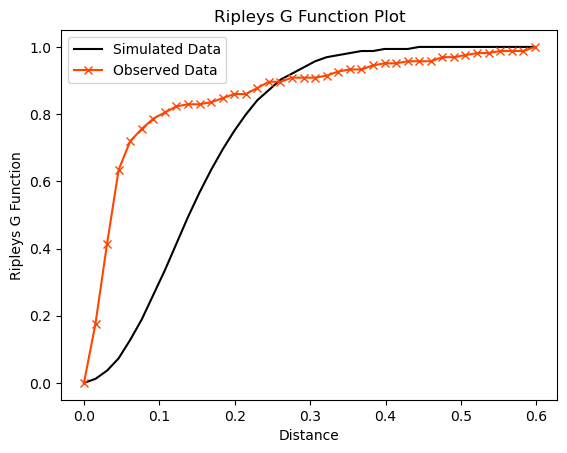

In [7]:
plt.plot(g_test.support, np.median(g_test.simulations, axis=0), 
         color='k', label='Simulated Data')
plt.plot(g_test.support, g_test.statistic, 
         marker='x', color='orangered', label='Observed Data')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Ripleys G Function')
plt.title('Ripleys G Function Plot')
plt.show()

### Ripley's K

In [8]:
k_test = distance_statistics.k_test(dg_gdf[['x','y']].values, keep_simulations=True)

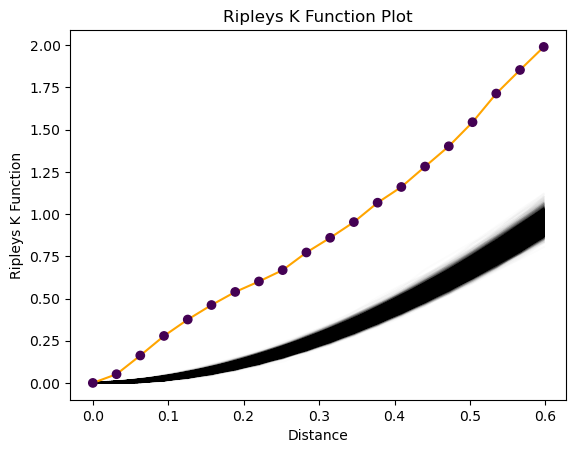

In [9]:
plt.plot(k_test.support, k_test.simulations.T, color='k', alpha=.01)
plt.plot(k_test.support, k_test.statistic, color='orange')

plt.scatter(k_test.support, k_test.statistic, 
            cmap='viridis', c=k_test.pvalue < .05,
            zorder=4
           )

plt.xlabel('Distance')
plt.ylabel('Ripleys K Function')
plt.title('Ripleys K Function Plot')
plt.show()